In [1]:
import sys

from jetson_inference import imageNet
from jetson_utils import videoSource, videoOutput, cudaFont, Log

from matplotlib import pyplot as plt

In [2]:
font = cudaFont() # 定义字体

In [3]:
net = imageNet("googlenet", sys.argv) # 导入识别模型

In [4]:
input = videoSource("orange_0.jpg", argv=sys.argv) # 配置需要导入检测的图片
output = videoOutput("output_img.jpg", argv=sys.argv) # 配置检测后图片的导出参数

In [5]:
img = input.Capture() # 获取图像数据

In [6]:
# 图像检测，返回检测结果
predictions = net.Classify(img, topK=1)

In [7]:
predictions

[(950, 0.966796875)]

In [8]:
# 绘制检测到的类标签
for n, (classID, confidence) in enumerate(predictions):
        classLabel = net.GetClassLabel(classID)
        confidence *= 100.0

        print(f"imagenet:  {confidence:05.2f}% class #{classID} ({classLabel})")

        font.OverlayText(img, text=f"{confidence:05.2f}% {classLabel}", 
                         x=5, y=5 + n * (font.GetSize() + 5),
                         color=font.White, background=font.Gray40)

imagenet:  96.68% class #950 (orange)


In [9]:
output.Render(img) # 导出图片到目录

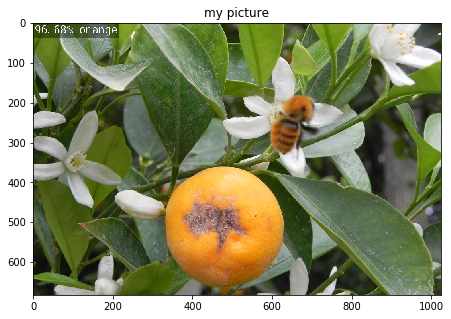

In [10]:
# 显示导出图片
fig = plt.figure(figsize=(10, 5)) 

plt.imshow(img)
plt.title('my picture')
plt.show()